## Evaluation of the Stresser Model

In [21]:
import pandas as pd
import json
import numpy as np
import altair as alt
from collections import Counter

alt.renderers.enable('default')
#alt.renderers.enable('notebook')
%matplotlib inline

#### Distribution of words in full data set

In [22]:
full = json.load(open("./data/middle_dutch_stresses.json", "r"))
print(len(full))

48219


In [23]:
syllabified_words = []
number_of_sylls = []

for d in full.values():
    syllabified_words.append(d['syllabified'])

for item in syllabified_words:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    number_of_sylls.append(cnt)


print('One-syll words in full dataset:', number_of_sylls.count(1))
print('Two-syll words in full dataset:', number_of_sylls.count(2))
print('Three-syll words in full dataset:', number_of_sylls.count(3))
print('Four-syll words in full dataset:', number_of_sylls.count(4))
print('Five-syll words in full dataset:', number_of_sylls.count(5))
print('Six-syll words in full dataset:', number_of_sylls.count(6))
print('Seven-syll words in full dataset:', number_of_sylls.count(7))



source = pd.DataFrame({
    'number of syllables per word': [7, 6, 5, 4, 3, 2, 1],
    'number of words in dataset': [number_of_sylls.count(7), number_of_sylls.count(6), number_of_sylls.count(5),
          number_of_sylls.count(4), number_of_sylls.count(3), number_of_sylls.count(2), number_of_sylls.count(1)]
})

chart = alt.Chart(source).mark_bar().encode(
    x='number of syllables per word',
    y='number of words in dataset')

text = chart.mark_text(
    align='right'
).encode(
    text='number of words in dataset'
)

chart + text

One-syll words in full dataset: 4027
Two-syll words in full dataset: 16140
Three-syll words in full dataset: 17825
Four-syll words in full dataset: 8270
Five-syll words in full dataset: 1721
Six-syll words in full dataset: 229
Seven-syll words in full dataset: 7


<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


#### Loading gold and silver datasets for evaluation

In [24]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold = [value["syllabified"] for value in gold]
items_silver = [value["syllabified"] for value in silver]

#### Convert to dataframes

In [25]:
df_gold = pd.DataFrame(value["syllabified"] for value in gold)
df_gold = df_gold.rename(index=str, columns={0: "gold_syllabification"})
#print(df_gold.head())
print('Total number of words in gold:', len(df_gold))

df_silver = pd.DataFrame(value["syllabified"] for value in silver)
df_silver = df_silver.rename(index=str, columns={0: "silver_syllabification"})
#print(df_silver.head())
print('Total number of words in silver:', len(df_silver))

Total number of words in gold: 4822
Total number of words in silver: 4822


#### General comparison between gold and silver dataframes

In [26]:
diff_keys = set(items_silver) ^ set(items_gold)
print('Mistakes are made against the syllabification these words:', diff_keys)

Mistakes are made against the syllabification these words: {'con-tin-ue-ren', 'ver-lac-hiert', 'do-mi-na-ti-o-ne', 'clae-ruus', 'cro-ni-quen', 'on-der-een', 'wes-tco-ninc', 'ghec-heit', 'on-de-reen', 'a-mien', 'buu-scen', 'es-char-loet', 'is-ma-ë-li-te', 'een-ec-hee-den', 'spaen-ghien', 'tra-vel-ieer-de', 'ond-li-uen', 'west-co-ninc', 'se-ra-pi-oe-ne', 'post-hu-mus', 'mon-tes-claer', 'grim-me-stoen', 'pro-mis-sioen', 'au-dien-tien', 'claer-uus', 'huesc-he-de', 'pro-miss-ioen', 'sa-muel', 'dur-io-le', 'hue-sche-de', 'of-fic-ia-le', 'mus-chen', 'con-uen-tua-le', 'alk-ma-re', 'lan-trech-te', 'is-maë-li-te', 'al-om-trent', 'sa-pi-oe-ne', 'eu-no-mi-a-ne', 'vlees-chel-kijn', 'pa-ijn', 'ont-reect', 'a-chil-le-us-se', 'vlee-schel-kijn', 'on-teert', 'au-tef-lu-ren', 'te-sco-ren', 'cas-taen-gier', 'daer-aen', 'wol-fram', 'his-paen', 'ga-ma-liel', 'mar-cy-a-le', 'doer-sni-den', 'mi-cha-el', 'a-drach-tich', 'vol-cwi-ghe', 'ont-ru-men', 'y-zai-en', 'ba-liu', 'du-ri-o-le', 'a-mi-en', 'ach-ti-en', 'c

In [27]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

value_counts = (result.gold_syllabification == result.silver_syllabification).value_counts()
print(value_counts)

True     4721
False     101
dtype: int64


#### Print dataframe with mistakes

In [28]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

true_false = result.set_index('correct?')
mistakes = true_false.loc[False]
mistakes

,gold_syllabification,silver_syllabification
correct?,,
False,se-ra-pi-oe-ne,se-rap-ioe-ne
False,an-ac-ho-ri-te,a-na-cho-ri-te
False,con-tin-ue-ren,con-ti-nue-ren
False,am-bass-ia-to-re,am-bas-s-ia-to-re
False,mon-tes-claer,mon-te-sclaer
False,jul-ie-nen,ju-lie-nen
False,be-di-en,be-dien
False,da-ne-sien,da-ne-si-en
False,is-ma-ë-li-te,is-maë-li-te


#### Expand dataframe with information about syllable counts

In [29]:
num_sylls_gold = []
num_sylls_silver = []


for item in items_gold:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_gold.append(cnt)


for item in items_silver:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_silver.append(cnt)
    
# Make df's

df_gold_syll_count = pd.DataFrame(num_sylls_gold)
df_gold_syll_count = df_gold_syll_count.rename(index=str, columns={0: "num_sylls_gold"})

df_silver_syll_count = pd.DataFrame(num_sylls_silver)
df_silver_syll_count = df_silver_syll_count.rename(index=str, columns={0: "num_sylls_silver"})

result_sylls = pd.concat([df_gold_syll_count, df_gold, df_silver_syll_count, df_silver], axis=1)

result_sylls['correct?'] = (df_gold_syll_count['num_sylls_gold'] == df_silver_syll_count['num_sylls_silver'])

x = result_sylls.set_index('correct?')
mistakes_number_of_sylls = x.loc[False]
mistakes_number_of_sylls
#print(mistakes_number_of_sylls)
print('Incorrect predictions about the number of syllables in a word:', len(mistakes_number_of_sylls), '(out of a total of', len(items_gold), 'words).')

Incorrect predictions about the number of syllables in a word: 38 (out of a total of 4822 words).


#### Calculate accuracy for mono- and polysyllable words

In [30]:
cnt_1syllable_words = 0
cnt_2syllable_words = 0
cnt_3syllable_words = 0
cnt_4syllable_words = 0
cnt_5syllable_words = 0
cnt_6syllable_words = 0
cnt_7syllable_words = 0


for item in items_gold:
    num_syl_word = item.split("-")
    if len(num_syl_word) == 1:
        cnt_1syllable_words += 1
    elif len(num_syl_word) == 2:
        cnt_2syllable_words += 1
    elif len(num_syl_word) == 3:
        cnt_3syllable_words += 1
    elif len(num_syl_word) == 4:
        cnt_4syllable_words += 1
    elif len(num_syl_word) == 5:
        cnt_5syllable_words += 1
    elif len(num_syl_word) == 6:
        cnt_6syllable_words += 1
    elif len(num_syl_word) == 7:
        cnt_7syllable_words += 1
        

cnt_1syllable_words_mistakes = 0
cnt_2syllable_words_mistakes = 0
cnt_3syllable_words_mistakes = 0
cnt_4syllable_words_mistakes = 0
cnt_5syllable_words_mistakes = 0
cnt_6syllable_words_mistakes = 0
cnt_7syllable_words_mistakes = 0


if len(num_sylls_gold) == len(num_sylls_silver):
    for i in range(len(num_sylls_gold)):
        if num_sylls_gold[i] == 1 and num_sylls_silver[i] != 1:
            cnt_1syllable_words_mistakes += 1
        if num_sylls_gold[i] == 2 and num_sylls_silver[i] != 2:
            cnt_2syllable_words_mistakes += 1
        if num_sylls_gold[i] == 3 and num_sylls_silver[i] != 3:
            cnt_3syllable_words_mistakes += 1
        if num_sylls_gold[i] == 4 and num_sylls_silver[i] != 4:
            cnt_4syllable_words_mistakes += 1
        if num_sylls_gold[i] == 5 and num_sylls_silver[i] != 5:
            cnt_5syllable_words_mistakes += 1
        if num_sylls_gold[i] == 6 and num_sylls_silver[i] != 6:
            cnt_6syllable_words_mistakes += 1
        if num_sylls_gold[i] == 7 and num_sylls_silver[i] != 7:
            cnt_7syllable_words_mistakes += 1

print('Total number of 1syllabic words:', cnt_1syllable_words, 'Mistakes:', cnt_1syllable_words_mistakes)
print('Total number of 2syllabic words:', cnt_2syllable_words, 'Mistakes:', cnt_2syllable_words_mistakes)
print('Total number of 3syllabic words:', cnt_3syllable_words, 'Mistakes:', cnt_3syllable_words_mistakes)
print('Total number of 4syllabic words:', cnt_4syllable_words, 'Mistakes:', cnt_4syllable_words_mistakes)
print('Total number of 5syllabic words:', cnt_5syllable_words, 'Mistakes:', cnt_5syllable_words_mistakes)
print('Total number of 6syllabic words:', cnt_6syllable_words, 'Mistakes:', cnt_6syllable_words_mistakes)
print('Total number of 7syllabic words:', cnt_7syllable_words, 'Mistakes:', cnt_7syllable_words_mistakes)    

try:
            
    print('Accuracy syllabification of one-syllable words:', float(100-cnt_1syllable_words_mistakes/cnt_1syllable_words))
    print('Accuracy syllabification of two-syllable words:', float(100-cnt_2syllable_words_mistakes/cnt_2syllable_words))
    print('Accuracy syllabification of three-syllable words:', float(100-cnt_3syllable_words_mistakes/cnt_3syllable_words))
    print('Accuracy syllabification of four-syllable words:', float(100-cnt_4syllable_words_mistakes/cnt_4syllable_words))
    print('Accuracy syllabification of five-syllable words:', float(100-cnt_5syllable_words_mistakes/cnt_5syllable_words))
    print('Accuracy syllabification of six-syllable words:', float(100-cnt_6syllable_words_mistakes/cnt_6syllable_words))
    print('Accuracy syllabification of seven-syllable words:', float(100-cnt_7syllable_words_mistakes/cnt_7syllable_words))

except ZeroDivisionError:
    print("You can't divide by zero!")

Total number of 1syllabic words: 397 Mistakes: 2
Total number of 2syllabic words: 1677 Mistakes: 9
Total number of 3syllabic words: 1755 Mistakes: 14
Total number of 4syllabic words: 798 Mistakes: 8
Total number of 5syllabic words: 172 Mistakes: 5
Total number of 6syllabic words: 23 Mistakes: 0
Total number of 7syllabic words: 0 Mistakes: 0
Accuracy syllabification of one-syllable words: 99.99496221662469
Accuracy syllabification of two-syllable words: 99.99463327370304
Accuracy syllabification of three-syllable words: 99.9920227920228
Accuracy syllabification of four-syllable words: 99.98997493734336
Accuracy syllabification of five-syllable words: 99.97093023255815
Accuracy syllabification of six-syllable words: 100.0
You can't divide by zero!


#### Analysis of stress pattern predictions

In [31]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold_human_annotation = [value["human_annotation"] for value in gold]
items_gold_corrected_stress = [value["corrected_stress"] for value in gold]
items_gold_patterns = [value["stress_idx"] for value in gold]

items_silver_predictions = [value["human_annotation"] for value in silver]

print(len(items_gold_human_annotation))
print(len(items_gold_corrected_stress))
print(len(items_gold_patterns))
print(len(items_silver_predictions))


gold_predictions = []
silver_predictions = []

for item1, item2, item3 in zip(items_gold_human_annotation, items_gold_corrected_stress, items_gold_patterns):
    if item1 is not None:
        gold_predictions.append(item1)
    elif item2 is not None:
        gold_predictions.append(item2)
    else:
        gold_predictions.append(item3) 

for item in items_silver_predictions:
    if len(item) == 1:
        silver_predictions.append(item)
    else:
        silver_predictions.append([item])


print('Total number of gold stress patterns:', len(gold_predictions))
print('Total number of silver stress patterns:', len(silver_predictions))

# Make df's

df_gold_stress = pd.DataFrame(gold_predictions)
df_gold_stress = df_gold_stress.rename(index=str, columns={0: "gold_stress"})

df_silver_stress = pd.DataFrame(silver_predictions)
df_silver_stress = df_silver_stress.rename(index=str, columns={0: "silver_stress"})

result_stress = pd.concat([df_gold_stress, df_gold, df_silver_stress, df_silver], axis=1)

result_stress['correct?'] = (df_gold_stress['gold_stress'] == df_silver_stress['silver_stress'])

x = result_stress.set_index('correct?')
x
mistakes_stress = x.loc[False]
mistakes_stress
#mistakes_stress.to_csv(r'mistakes4.csv')

4822
4822
4822
4822
Total number of gold stress patterns: 4822
Total number of silver stress patterns: 4822


,gold_stress,gold_syllabification,silver_stress,silver_syllabification
correct?,,,,
False,-2,ed-war-de,-3,ed-war-de
False,"[-4, -2]",ba-ro-ni-en,-3,ba-ro-ni-en
False,-2,vlee-sach-tich,"[-3, -2]",vlee-sach-tich
False,-2,y-sa-yas,"[-3, -1]",y-sa-yas
False,-2,mael-tijt,-1,mael-tijt
False,-2,op-hout,-1,op-hout
False,-3,trae-no-ge,-2,trae-no-ge
False,-1,vrye-rie,-2,vrye-rie
False,-2,pel-grijn,-1,pel-grijn


In [32]:
# Confusion matrix
string_gold = []
string_silver = []
for item in gold_predictions:
    if isinstance(item, int):
        item = [item]
    new_gold = '|'.join([str(i) for i in item])
    string_gold.append(new_gold) 
print(string_gold)

for item in silver_predictions:
    new_silver = '-'.join([str(i) for i in item])
    string_silver.append(new_silver) 
#print(string_silver)
#print(silver_predictions)

import numpy as np
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(string_gold, string_silver)
conf_matrix

['-2', '-1', '-2', '-1', '-1', '-2', '-4|-2', '-3|-1', '-3|-1', '-4|-2', '-3|-1', '-2', '-3|-1', '-2', '-3', '-2', '-1', '-2', '-2', '-2', '-2', '-2', '-3|-1', '-5|-3', '-1', '-3|-1', '-2', '-3|-1', '-1', '-1', '-2', '-2', '-4|-2', '-2', '-4|-2', '-1', '-3', '-4|-1', '-5|-2', '-1', '-2', '-1', '-2', '-1', '-3|-1', '-4|-2', '-2', '-2', '-1', '-2', '-3|-1', '-2', '-3', '-1', '-2', '-2', '-4|-2', '-2', '-1', '-2', '-4|-2', '-4|-2', '-2', '-1', '-3', '-2', '-1', '-1', '-2', '-2', '-4|-2', '-1', '-1', '-1', '-1', '-2', '-1', '-3', '-1', '-3|-1', '-2', '-2', '-2', '-2', '-2', '-3|-1', '-2', '-4|-2', '-4|-2', '-1', '-1', '-2', '-2', '-4|-2', '-3|-1', '-2', '-2', '-1', '-2', '-1', '-1', '-1', '-2', '-2', '-3|-1', '-2', '-1', '-1', '-2', '-5|-3|-1', '-3', '-1', '-4|-2', '-3|-1', '-3|-1', '-2', '-3|-1', '-4|-2', '-4|-2', '-1', '-3|-1', '-3|-1', '-3|-1', '-1', '-4|-2', '-3|-1', '-2', '-2', '-1', '-2', '-4|-2', '-2', '-5|-3', '-4|-2', '-3', '-1', '-3|-1', '-1', '-4|-2', '-4|-2', '-3|-1', '-4|-2', 

array([[1032,   41,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          13,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    6],
       [  42, 1901,   22,    0,    0,    0,    0,    0,    0,    0,    0,
          10,    9,    9,    0,    0,    4,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   10],
       [   0,   32,  231,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    2,    6,    0,    0,    2,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   6,   14,    7,    0,    0,    0,    0,    0,    0,    0,    0,
           5,  612,    1,    0,    0,    7,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    

In [33]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

Confusion matrix:
Predicted       -1    -2   -3  -3|-1  -4  -4|-1  -4|-2  -5|-2  -5|-3  \
Actual                                                                 
-1            1032    41    0      0   0      0      0      0      0   
-2              42  1901   22      0   0      0      0      0      0   
-3               0    32  231      0   1      0      0      0      0   
-3|-1            6    14    7      0   0      0      0      0      0   
-4               0     0    0      0   0      0      0      0      0   
-4|-1            1     0    0      0   0      0      0      0      0   
-4|-2            0     4    8      0   5      0      0      0      0   
-5|-2            0     0    0      0   0      0      0      0      0   
-5|-3            0     0    0      0   0      0      0      0      0   
-5|-3|-1         0     0    0      0   0      0      0      0      0   
-6|-4|-2         0     0    0      0   0      0      0      0      0   
[-2, -1]         0     0    0      0   0      

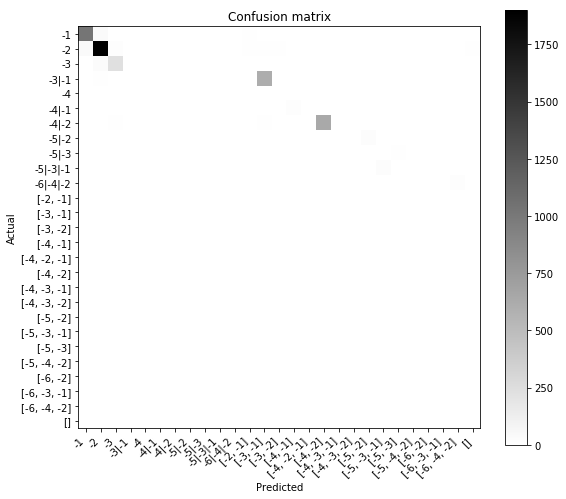

In [34]:
from pandas_ml import ConfusionMatrix

confusion_matrix = ConfusionMatrix(string_gold, string_silver)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot()

In [35]:
stress_patterns = []
num_sylls = []


for lemma in full.values():
    if lemma['human_annotation'] is not None:
        stress_patterns.append(lemma['human_annotation'])
    if lemma['human_annotation'] is None:
        if lemma['corrected_stress'] is not None:
            stress_patterns.append((lemma['corrected_stress']))
    if lemma['human_annotation'] is None:
        if lemma['corrected_stress'] is None:
            stress_patterns.append((lemma['stress_idx']))
            
print('Total number of words:', len(stress_patterns))

string_gold = []

for item in stress_patterns:
    if isinstance(item, int):
        item = [item]
    if isinstance(item, list):
        new_gold = '|'.join([str(i) for i in item])
        string_gold.append(new_gold) 

res = Counter(string_gold)
print('Number of different stress patterns:',len(res))
print('Stress patterns:', res)

Total number of words: 48219
Number of different stress patterns: 19
Stress patterns: Counter({'-2': 19556, '-1': 10870, '-4|-2': 7072, '-3|-1': 6707, '-3': 2800, '-5|-2': 380, '-4|-1': 273, '-5|-3|-1': 226, '-6|-4|-2': 163, '-5|-3': 154, '-6|-2': 3, '-7|-5|-2': 3, '-4': 3, '-6|-4|-1': 2, '-6|-3': 2, '-7|-4|-2': 2, '-7|-5|-3|-1': 1, '-6|-3|-1': 1, '-5|-1': 1})


In [36]:
words = []
syllabified = []
num_sylls = []
pattern = []

for key in full.keys():
    words.append(key)
    
for lemma in full.values():
    syllabified.append(lemma['syllabified'])
    cnt = 0
    num = lemma['syllabified'].split("-")
    cnt += (len(num))
    num_sylls.append(cnt)
    if lemma['human_annotation'] is not None:
        pattern.append(lemma['human_annotation'])
    if lemma['human_annotation'] is None:
        if lemma['corrected_stress'] is not None:
            pattern.append((lemma['corrected_stress']))
    if lemma['human_annotation'] is None:
        if lemma['corrected_stress'] is None:
            pattern.append((lemma['stress_idx']))

df_word = pd.DataFrame(words)
df_word.rename(index=str, columns={0: "word"})
    
df_syllabified = pd.DataFrame(syllabified)
df_syllabified.rename(index=str, columns={0: "syllabified"})

df_num_sylls = pd.DataFrame(num_sylls)
df_num_sylls.rename(index=str, columns={0: "num_sylls"})

df_pattern = pd.DataFrame(pattern)
df_pattern.rename(index=str, columns={0: "pattern"})

result = pd.concat([df_word, df_syllabified, df_num_sylls, df_pattern], axis=1)
result.to_csv(r'stress_patterns_in_data.csv')